In [1]:
import os
import simulation
import pynbody
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from data_pd.dump_features import dump_features
from simulation.sfh_in_box import binned_sfh, plot_binned_sfh
import tqdm
import astropy.units as u
from simulation.units import *
from simulation.angmom import sideon, faceon

In [2]:
# SIM_PATH = "/media/michele/My Book/Michele/MySimulations/MovingBox/np/mb.62002_pXX_a800_r600"
SIM_PATH = "/home/michele/sim/MySimulations/ng/mb.71002_pXX_a800_r600"
PERI_LIST = [50, 100, 150, 200, 300]

In [3]:
NTH = 10

In [4]:
sims = list()
for peri in PERI_LIST:
    sim_path = os.path.join(SIM_PATH.replace('XX', str(peri)), 'out')
    sims.append(simulation.Simulation(sim_path, snap_indexes=slice(None, None, NTH))) 

loading simulation: /home/michele/sim/MySimulations/ng/mb.71002_p50_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Taking 57 snapshots (slice(None, None, 10))
Loading cosmological parameters
Found trace file
loading simulation: /home/michele/sim/MySimulations/ng/mb.71002_p100_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Taking 57 snapshots (slice(None, None, 10))
Loading cosmological parameters
Found trace file
loading simulation: /home/michele/sim/MySimulations/ng/mb.71002_p150_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Taking 57 snapshots (slice(None, None, 10))
Loading cosmological parameters
Found trace file
loading simulation: /home/michele/sim/MySimulations/ng/mb.71002_p200_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Taking 57 snapshots (slice(None, None, 10))
Loading cosmological parameters
Found trace file
loading simulation: /home/michele/sim/MySimulations/n

In [5]:
cache_files = ['mb.71002_pXX_a800_r600_s5.fits'.replace('XX', str(peri)) for peri in PERI_LIST]

In [6]:
cache_files

['mb.71002_p50_a800_r600_s5.fits',
 'mb.71002_p100_a800_r600_s5.fits',
 'mb.71002_p150_a800_r600_s5.fits',
 'mb.71002_p200_a800_r600_s5.fits',
 'mb.71002_p300_a800_r600_s5.fits']

In [7]:
tbl_list = list()
tbl_list = [Table.read(os.path.join('data_pd', f)) for f in cache_files]

# Trajectories

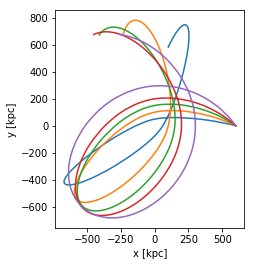

In [8]:
fig, ax = plt.subplots()
for sim in sims:
    ax.plot(sim.trace.x, sim.trace.y)
    ax.set_aspect('equal')
    ax.set_xlabel('x [kpc]')
    ax.set_ylabel('y [kpc]')

In [9]:
a = sims[0]

# SFH

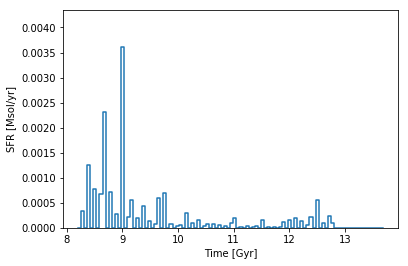

In [10]:
fig, ax = plt.subplots()
bins_sfh = 100
hist, binedges = plot_binned_sfh(sim, bins=bins_sfh, ax=ax, drawstyle='steps')

100%|██████████| 5/5 [00:01<00:00,  3.76it/s]


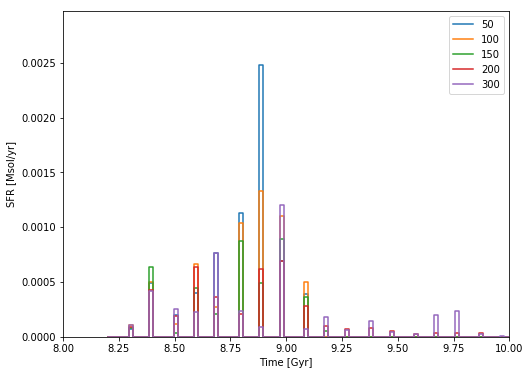

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
for sim in tqdm.tqdm(sims):
    plot_binned_sfh(sim, bins=300, ax=ax, label=sim.peri, drawstyle='default');
    
ax.set_xlim(8, 10)
ax.legend()

In [12]:
# i = a._sim_dir.find('_p')
# j = a._sim_dir.find('_a')
# a._sim_dir[i+2:j]

In [13]:
# fig, ax = plt.subplots(figsize=(8,6))
# for sim in sims:
#     print(sim.peri)
#     plot_sfh(sim, ax=ax, label=sim.peri)#, trange=a.t_range, bins=20)

# Effective radius

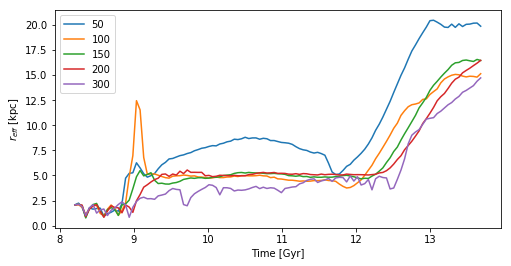

In [14]:
fig, ax = plt.subplots(figsize=(8,4))
for tbl, sim in zip(tbl_list, sims):
    ax.plot(tbl['t'][::5], tbl['r_eff'][::5], label=sim.peri)
ax.set_xlabel('Time [Gyr]')
ax.set_ylabel('$r_{eff}$ [kpc]')
ax.legend();

# Metals

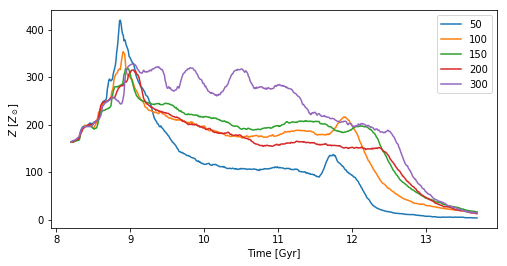

In [17]:
fig, ax = plt.subplots(figsize=(8,4))
for tbl, sim in zip(tbl_list, sims):
    ax.plot(tbl['t'], tbl_m[sim.peri], label=sim.peri)
# ax.set_yscale('log')
ax.set_xlabel('Time [Gyr]')
ax.set_ylabel('$Z$ [$Z_\odot$]')
ax.legend();

# Profiles

In [18]:
pynbody.units.Unit('1e10 Msol kpc**3 s**2')

Unit("1.00e+10 Msol kpc**3 s**2")

In [19]:
from simulation.derived import feh, mgfe

In [20]:
snap

<SimSnap "/home/michele/sim/MySimulations/ng/mb.71002_p300_a800_r600/out/snapshot_0561" len=20949>

<SimSnap "/home/michele/sim/MySimulations/ng/mb.71002_p50_a800_r600/out/snapshot_0021::star" len=5759>


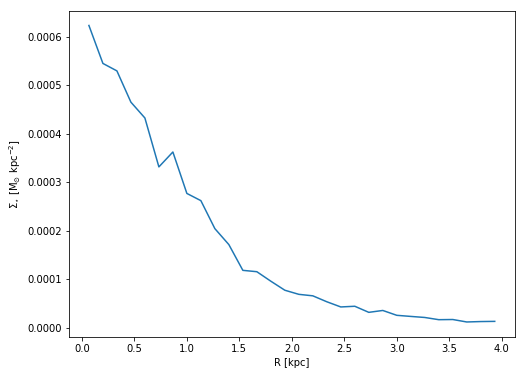

In [21]:
# create a profile object for the stars (by default this is a 2D profile)
snap = sims[0][2]
# myfaceon(snap.s)
sideon(snap.s)
print(snap.s)
snap.properties['eps'] = 0.03


p = pynbody.analysis.profile.Profile(snap.s, min=0.0, max=4, nbins=30, type='lin', ndim=2)
pg = pynbody.analysis.profile.Profile(snap.s, min=0.0, max=4, nbins=30, type='lin', ndim=2)
# make the figure and sub plots
f, ax = plt.subplots(figsize=(8,6))

# make the plot
ax.plot(p['rbins'], p['density'])
# ax.semilogy()
ax.set_xlabel('R [kpc]')
# ax.set_ylabel(r'$\Sigma_{\star}$ [M$_{\odot}$ kpc$^{-2}$]');
ax.set_ylabel(r'$\Sigma_{\star}$ [M$_{\odot}$ kpc$^{-2}$]');

# Stripping radius

In [50]:
sim=sims[4]
snap = sim[1]

In [51]:
sim.peri

'300'

In [52]:
sideon(snap.s)
p = pynbody.analysis.profile.Profile(snap, min=0.1, max=4, nbins=100, type='lin', ndim=3)
ps = pynbody.analysis.profile.Profile(snap.s, min=0.1, max=4, nbins=100, type='lin', ndim=3)
pg = pynbody.analysis.profile.Profile(snap.g, min=0.1, max=4, nbins=100, type='lin', ndim=3)

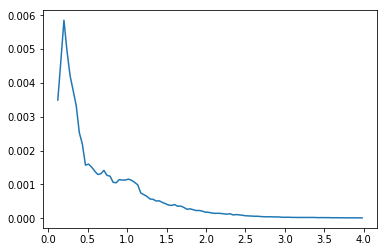

In [53]:
plt.plot(pg['rbins'], pg['density'])

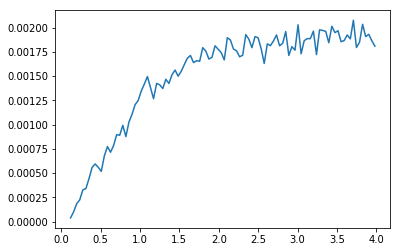

In [54]:
plt.plot(p['rbins'], p['mass'])


In [55]:
locations = np.digitize(snap.header.time, sim.dens_trace.t, right=True)
int(locations)

6241

In [56]:
sim.dens_trace.rho[int(locations)]

4.56108e-09

In [57]:
rho  = pynbody.array.SimArray(sim.dens_trace.rho[int(locations)], gadget_dens_units)
v_host = pynbody.array.SimArray(sim.dens_trace.vel[int(locations)],  gadget_vel_units)
rho, v_host

(SimArray(4.56108e-09, '1.00e+10 Msol kpc**-3'), SimArray(733.099, 'km s**-1'))

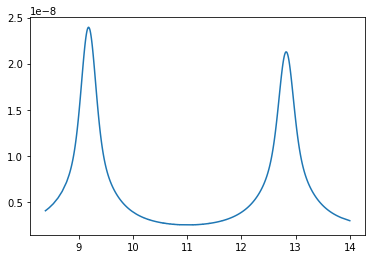

In [58]:
plt.plot(sim.dens_trace.t, sim.dens_trace.rho)

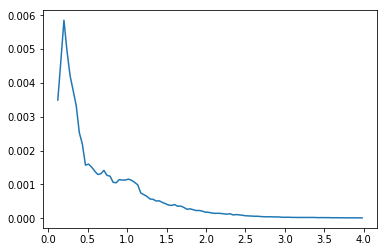

In [59]:
f, ax = plt.subplots()
# ax.plot(p['rbins'], p['mass'])
ax.plot(pg['rbins'], pg['density'])


In [60]:
G = pynbody.array.SimArray(6.674e-11, pynbody.units.Unit("N kg**-2 m**2"))
G

SimArray(6.674e-11, 'N kg**-2 m**2')

In [61]:
p_grav = G * p['mass']*pg['density']/p['rbins']
p_grav.in_units('Pa')

SimArray([3.25184266e-14, 8.56121090e-14, 1.59088715e-13, 1.36512147e-13,
          1.45740316e-13, 1.18894879e-13, 1.21366521e-13, 1.04695342e-13,
          8.77533110e-14, 5.45053681e-14, 4.73932630e-14, 5.44971388e-14,
          5.34675636e-14, 4.30752956e-14, 4.50950832e-14, 5.24449139e-14,
          4.42244423e-14, 4.59853643e-14, 3.30342921e-14, 3.64523090e-14,
          4.09936863e-14, 4.21575978e-14, 4.21296368e-14, 4.45894177e-14,
          4.38510362e-14, 4.22025217e-14, 3.50987096e-14, 2.34917128e-14,
          2.38811685e-14, 2.12173269e-14, 1.76766001e-14, 1.80056277e-14,
          1.55188707e-14, 1.61540330e-14, 1.48225125e-14, 1.26986132e-14,
          1.16195661e-14, 1.14966401e-14, 1.24269875e-14, 1.08087678e-14,
          1.02545358e-14, 9.05790763e-15, 7.28707873e-15, 8.14583529e-15,
          7.10289196e-15, 5.95620205e-15, 5.96586100e-15, 5.74415580e-15,
          4.73968523e-15, 4.44235916e-15, 3.69513112e-15, 3.83481809e-15,
          3.77389994e-15, 3.41297908e-

In [62]:
p_rps = rho * v_host**2
p_rps.in_units('Pa')

SimArray(1.65942449e-15, 'Pa')

In [73]:
fun = (p_grav/p_rps).in_units(1)
fun

SimArray([1.95962074e+01, 5.15914459e+01, 9.58698122e+01, 8.22647536e+01,
          8.78258195e+01, 7.16482609e+01, 7.31377183e+01, 6.30913564e+01,
          5.28817740e+01, 3.28459465e+01, 2.85600599e+01, 3.28409873e+01,
          3.22205462e+01, 2.59579726e+01, 2.71751341e+01, 3.16042785e+01,
          2.66504698e+01, 2.77116340e+01, 1.99070775e+01, 2.19668379e+01,
          2.47035562e+01, 2.54049509e+01, 2.53881011e+01, 2.68704107e+01,
          2.64254483e+01, 2.54320229e+01, 2.11511338e+01, 1.41565421e+01,
          1.43912354e+01, 1.27859550e+01, 1.06522473e+01, 1.08505255e+01,
          9.35195953e+00, 9.73472011e+00, 8.93232113e+00, 7.65242003e+00,
          7.00216619e+00, 6.92808872e+00, 7.48873334e+00, 6.51356409e+00,
          6.17957360e+00, 5.45846326e+00, 4.39132889e+00, 4.90883154e+00,
          4.28033453e+00, 3.58931790e+00, 3.59513857e+00, 3.46153490e+00,
          2.85622229e+00, 2.67704808e+00, 2.22675460e+00, 2.31093256e+00,
          2.27422215e+00, 2.05672454e+

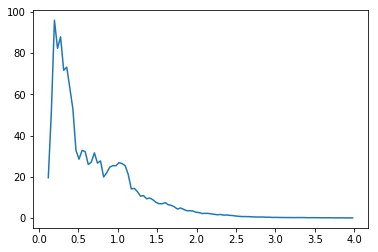

In [74]:
plt.plot(p['rbins'], fun)

In [77]:
idx = np.abs(fun.in_units(1)-1).argmin()
r_strip = p['rbins'][idx]
r_strip

2.4985

In [98]:
def compute_r_strip(sim, snap):
    try:
        sideon(snap.s)
    except ValueError:
        return np.nan
    p = pynbody.analysis.profile.Profile(snap, min=0.1, max=4, nbins=100, type='lin', ndim=3)
    pg = pynbody.analysis.profile.Profile(snap.g, min=0.1, max=4, nbins=100, type='lin', ndim=3)
    p_grav = G * p['mass']*pg['density']/p['rbins']
    
    locations = np.digitize(snap.header.time, sim.dens_trace.t, right=True)
    rho  = pynbody.array.SimArray(sim.dens_trace.rho[int(locations)], gadget_dens_units)
    v_host = pynbody.array.SimArray(sim.dens_trace.vel[int(locations)],  gadget_vel_units)
    
    p_rps = rho * v_host**2

    fun = (p_grav/p_rps).in_units(1)
    idx = np.abs(fun.in_units(1)-1.0).argmin()
    rs = p['rbins'][idx]
    return rs

In [104]:
r_strip_list = list()
for snap in tqdm.tqdm(sim):
    rs1 = compute_r_strip(sim, snap)
#     print(rs1)
    r_strip_list.append(rs1)
r_strip = np.array(r_strip_list)

100%|██████████| 57/57 [00:03<00:00, 15.98it/s]


In [105]:
r_strip

array([2.9275, 2.4985, 2.7325, 1.8745, 2.0695, 1.4455, 1.6795, 0.1975,
       1.3675, 2.3425, 1.4065, 2.6155, 2.7325, 1.9915, 1.4065, 1.6795,
       0.5875, 1.0165, 0.2755, 2.8105, 2.2645, 1.9525, 2.3425, 0.5095,
       0.2365, 2.9275, 0.1195, 3.1225, 2.8105, 2.8885, 2.6155, 2.5375,
       2.0305, 1.0555, 0.1585, 0.6265, 0.1585, 1.3285, 1.4455, 0.4705,
       0.8215, 0.5485, 0.2365, 2.4595, 2.5375, 3.9805, 2.4985, 1.2505,
       2.8105, 3.0055, 3.4735,    nan,    nan,    nan,    nan,    nan,
          nan])

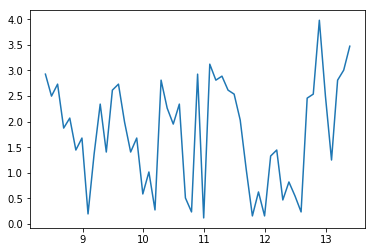

In [108]:
plt.plot(sim.times.in_units(gadget_time_units), r_strip)

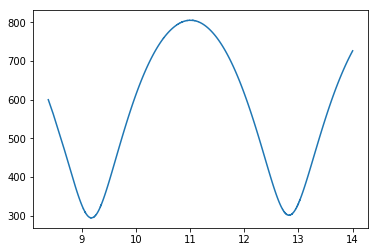

In [109]:
plt.plot(sim.dens_trace.t, sim.dens_trace.r)

## For loop

In [ ]:
surf_bright = {}
v_circ = {}
dens = {}
sim = sims[1]
for i, snap in enumerate(sim):
    # myfaceon(snap.s)
    mysideon(snap.s)
    print(snap.s)
    snap.properties['eps'] = 0.03
    p = pynbody.analysis.profile.Profile(snap.s, max=4, nbins=100, type='lin', ndim=2)
    surf_bright[i+1] = p['sb']
    v_circ[i+1] = p['v_circ']
    dens[i+1] = p['density']
# TODO catch the ValueError for few particles and skip snaps

In [25]:
tbl_v_circ = Table({str(k):v*u.km/u.s for (k,v) in v_circ.items()})
tbl_sb = Table({str(k):v*u.mag/u.arcsec**2 for (k,v) in surf_bright.items()})
tbl_dens = Table({str(k):v.in_units('Msol kpc**-2')*u.solMass/u.kpc**2 for (k,v) in dens.items()})

SyntaxError: invalid syntax (<ipython-input-25-45cb7be563ee>, line 1)

In [ ]:
tbl_v_circ['rbins'] = tbl_sb['rbins'] = tbl_dens['rbins'] = p['rbins']*u.kpc

In [24]:
tbl_v_circ.write('71p{}prof_v_circ.fits'.format(sim.peri), overwrite=True)
tbl_sb.write('71p{}prof_sb.fits'.format(sim.peri), overwrite=True)
tbl_dens.write('71p{}prof_dens.fits'.format(sim.peri), overwrite=True)

In [30]:
sphere = pynbody.filt.Sphere(5 * pynbody.units.kpc)
sim[0].s['v_mag']

SimArray([-4.64873251, -4.65790806, -4.65767434, ..., -4.75508825,
          -4.66428094, -4.75875018])

In [26]:
str(71002)[:2]

'71'

In [31]:
# sphere = pynbody.filt.Sphere(5 * pynbody.units.kpc)
# metals_d = dict()
# for sim in sims:
#     metals_l = list()
#     for snap in tqdm.tqdm(sim.snap_list):
#         pynbody.analysis.halo.center(snap.s, vel=False)
#         metals_l.append(snap.s[sphere]['metals'].sum())
#     metals = np.array(metals_l)
#     metals_d[sim.peri] = metals
# tbl = Table(metals_d)
# tbl.write('71metals_s5.fits')